In [24]:
import yaml
import rospkg
import numpy as np
import cv2
import pandas as pd
import rospy
from nav_msgs.msg import OccupancyGrid
from cv_bridge import CvBridge, CvBridgeError
import matplotlib.pyplot as plt


In [25]:
bridge = CvBridge()
rospy.init_node("rooms", anonymous=True)

In [10]:
def read_yaml(known_locations_file='/known_locations.yaml'):
    rospack = rospkg.RosPack()
    file_path = rospack.get_path('config_files') + known_locations_file

    with open(file_path, 'r') as file:
        content = yaml.safe_load(file)
    return content
def yaml_to_df(known_locations_file='/known_locations.yaml'):
    con = read_yaml(known_locations_file)
    values=[]
    locations=[]
    for c in con:
        locations.append(c)

        for i in range(len(con[c])):
            values.append(list(con[c][i].values())[0])

    data=np.asarray(values).reshape((int(len(values)/7),7))    #x , y ,theta  ,quat   since z always 0
    df= pd.DataFrame( data)
    df.columns=['x','y','th','qx','qy','qz','qw']
    df['child_id_frame']=locations
    return df


In [2]:
df2=df.iloc[0,:3].copy()

NameError: name 'df' is not defined

In [8]:
import rospkg
rospack = rospkg.RosPack()
df=read_yaml('/segmentation_params.yaml')
df

{'hg': 0.95,
 'lg': 0.001,
 'lower': 100,
 'higher': 500000,
 'reg_ly': 100,
 'reg_hy': 450}

In [34]:
df['x']

6.769

shutdown request: [/smach] Reason: new node registered with same name


In [30]:
ddf

,x,y,theta,qx,qy,qz,qw
0,6.769,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,-1.515,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,0.77,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,0.0,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,0.536,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,0.844


In [15]:
df=yaml_to_df('/known_locations.yaml')
#df=yaml_to_df('/known_locations_sim.yaml')

In [16]:
xys=[]
xys.append(df[df['child_id_frame']=='bedroom'][['x','y']].values.ravel())
xys.append(df[df['child_id_frame']=='living_room'][['x','y']].values.ravel())
xys.append(df[df['child_id_frame']=='dining_room'][['x','y']].values.ravel())
xys.append(df[df['child_id_frame']=='kitchen'][['x','y']].values.ravel())
room_names=['bedroom','living_room','dining_room','kitchen']
xys, room_names

([array([ 4.606, -2.496]),
  array([ 9.446, -2.537]),
  array([ 9.614, -3.614]),
  array([ 6.894, -2.234])],
 ['bedroom', 'living_room', 'dining_room', 'kitchen'])

In [26]:

map_msg= rospy.wait_for_message('/prohibition_layer_map', OccupancyGrid)
#map_msg= rospy.wait_for_message('/augmented_map', OccupancyGrid)
inflated_map= np.asarray(map_msg.data)
#cv2.imwrite('/home/roboworks/Pictures/inflatedmap.png',inflated_map)

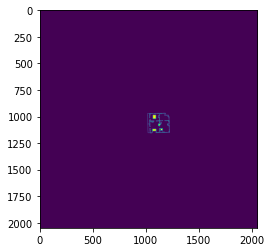

In [27]:

img_map=inflated_map.reshape((map_msg.info.width,map_msg.info.height))


plt.imshow(img_map)

In [8]:
origin_map_img=[round(img_map.shape[0]*0.5) ,round(img_map.shape[1]*0.5)]

In [33]:
origin_map_img=[round(img_map.shape[0]*0.5) ,round(img_map.shape[1]*0.5)]
#humanpose=detect_human_to_tf()  #make sure service is running

In [34]:
#OPTION CHECK CLOSEST  KNOWN LOCATION FOR ROOM


if humanpose== False:
    
    print ('no human ')
    
else : 
    human_pose,_=tf_man.getTF('human')

    pose=human_pose[:2]
    
    if img_map[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m)]!=0:#### Yes axes seem to be "flipped" !=0:
            print ('reject point, most likely part of the audience, outside of the arena map')
            
    dists=(pose-np.asarray(xys))
    human_room=room_names[np.linalg.norm(dists, axis=1).argmin()]
    print(f'human in {human_room}')
    
    robot_pose=get_robot_px()
    dists=(robot_pose-np.asarray(xys))
    robot_room=room_names[np.linalg.norm(dists, axis=1).argmin()]
    print(f'Robot  in {robot_room}')
    
    if robot_room != human_room: print('maybe false positive... ignoring... ')
    

NameError: name 'humanpose' is not defined

In [28]:
def draw_at (px,py, contoured):
    contoured[px-5:px+5,py-5:py+5]=200
    return contoured
    

In [29]:
robot_pose=get_robot_px()
px_pose_robot=np.asarray((origin_map_img[1]+robot_pose[1],origin_map_img[0]+robot_pose[0]))
iimg=draw_at(px_pose_robot[0], px_pose_robot[1] , img_map )   #ROBOT PX POSE

NameError: name 'get_robot_px' is not defined

In [35]:
#iimg=draw_at(origin_map_img[1]+ round( robot_pose[1]), origin_map_img[0]+ round(robot_pose[0]) , img_map )   #ROBOT PX POSE
iimg=draw_at(origin_map_img[1]+ round(pose[1]/pix_per_m), origin_map_img[0]+ round(pose[0]/pix_per_m) , img_map )### HUMAN PX POSE


NameError: name 'pose' is not defined

In [36]:
plt.imshow(origin_map_img[750:1300,750:1300])

#2 spots   human and robot

TypeError: list indices must be integers or slices, not tuple

In [25]:
import cv2
cv2.imwrite('/home/roboworks/Pictures/imgmap.png', img_map)
img_map_rooms=cv2.imread('/home/roboworks/Pictures/imgmap.png')

In [16]:
plt.imshow(img_map_rooms)  ## IMAGE FOR ROOM REGIOS

NameError: name 'img_map_rooms' is not defined

In [39]:
import cv2
import matplotlib.pyplot as plt

import numpy as np
#cv2.imwrite('/home/roboworks/Pictures/imgmap.png', img_map)
#img_map_rooms=cv2.imread('/home/roboworks/Pictures/imgmap.png')

cropping = False

x_start, y_start, x_end, y_end = 0, 0, 0, 0

image = img_map_rooms[750:1250,750:1250]
oriImage = image.copy()
ii = image.copy()
room_no=0
regions=[]
global room_no , regions
def mouse_crop(event, x, y, flags, param):
    # grab references to the global variables
    global x_start, y_start, x_end, y_end, cropping,room_no
    
    # if the left mouse button was DOWN, start RECORDING
    # (x, y) coordinates and indicate that cropping is being
    if event == cv2.EVENT_LBUTTONDOWN:
        

        x_start, y_start, x_end, y_end = x, y, x, y
        cropping = True
        

    # Mouse is Moving
    elif event == cv2.EVENT_MOUSEMOVE:
        if cropping :
            x_end, y_end = x, y

    # if the left mouse button was released
    elif event == cv2.EVENT_LBUTTONUP:
        # record the ending (x, y) coordinates
        x_end, y_end = x, y
        cropping = False # cropping is finished

        refPoint = [(x_start, y_start), (x_end, y_end)]

        if len(refPoint) == 2: #when two points were found
            room_no+=1
            print (room_no)
            cv2.rectangle(ii, (x_start, y_start), (x_end, y_end), (255*np.random.rand(),255*np.random.rand(),255*np.random.rand()), -1)
            regions.append(((x_start+750, y_start+750), (x_end+750, y_end+750)))
            print (regions)
            cv2.putText(ii, f'room{room_no}', (x_end,y_end),cv2.FONT_HERSHEY_SIMPLEX, 1 , (255, 0, 0),cv2.LINE_4)
            cv2.imshow("rooms", ii)

cv2.namedWindow("image")
cv2.setMouseCallback("image", mouse_crop)

while True:

    i = image.copy()

    if not cropping:
        cv2.imshow("image", image)
        

    elif cropping:
        cv2.rectangle(i, (x_start, y_start), (x_end, y_end), (255, 255,255), 6)
        cv2.imshow("image", i)
    
    
    
    keystroke = cv2.waitKey(0)
    if 32 <= keystroke and keystroke < 128:
        key = chr(keystroke).lower()
        print (key)
        if key=='q':
            cv2.destroyAllWindows()
            
            break


living_room_px_region=np.asarray(regions[0])
kitchen_px_region=np.asarray(regions[1])
bedroom_px_region=np.asarray(regions[2])
dining_room_px_region=np.asarray(regions[3])
    
# close all open windows


[ WARN] [1688734826.633694137]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2747.883000 according to authority /pose_integrator
[ WARN] [1688734826.633742701]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2747.883000 according to authority /pose_integrator
[ WARN] [1688734826.633779099]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2747.883000 according to authority /pose_integrator
[ WARN] [1688734826.633813826]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2747.883000 according to authority /pose_integrator
[ WARN] [1688734826.633840610]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2747.883000 according to authority /pose_integrator
[ WARN] [1688734826.633866868]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2747.883000 according to authority /pose_integrator


1
[((1012, 1045), (1125, 1151))]
2
[((1012, 1045), (1125, 1151)), ((1123, 1040), (1217, 1149))]
3
[((1012, 1045), (1125, 1151)), ((1123, 1040), (1217, 1149)), ((1123, 971), (1212, 1038))]
4
[((1012, 1045), (1125, 1151)), ((1123, 1040), (1217, 1149)), ((1123, 971), (1212, 1038)), ((1027, 968), (1122, 1043))]
q


In [17]:

    living_room_px_region=np.asarray(((1012, 1045), (1125, 1151)))
    kitchen_px_region=np.asarray(((1123, 1040), (1217, 1149)))
    bedroom_px_region=np.asarray(((1123, 971), (1212, 1038)))
    dining_room_px_region=np.asarray(((1027, 968), (1122, 1043)))

In [ ]:

humanpose=detect_human_to_tf()  #make sure service is running

if humanpose== False:
    
    print ('no human ')
    
else : 
    human_pose,_=tf_man.getTF('human')

    pose=human_pose[:2]
    px_pose_human=np.asarray(([origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m)]))
    # if img_map[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m)]!=0:#### Yes axes seem to be "flipped" !=0:
    #        print ('reject point, most likely part of the audience, outside of the arena map')
    
    #pose=get_robot_px()
    #px_pose_robot=np.asarray((origin_map_img[1]+pose[1],origin_map_img[0]+pose[0]))
    #origin_map_img=[round(img_map.shape[0]*0.5) ,round(img_map.shape[1]*0.5)]
    #room_robot = check_room_px(np.flip(px_pose_robot),living_room_px_region,kitchen_px_region,bedroom_px_region,dining_room_px_region)
    room_human =check_room_px(np.flip(px_pose_human),living_room_px_region,kitchen_px_region,bedroom_px_region,dining_room_px_region)

    print ('px human',px_pose_human)
    print('room_human',room_human)
    #print('room_robot,room_human',room_robot,room_human)

[5.187606216487556, -0.06891376490898793]


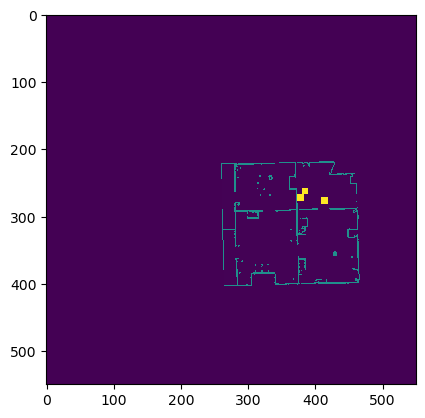

In [22]:
print (pose)
iimg=draw_at(origin_map_img[1]+ round(pose[1]/pix_per_m), origin_map_img[0]+ round(pose[0]/pix_per_m) , img_map )### HUMAN PX POSE
plt.imshow (iimg[750:1300,750:1300])

In [ ]:
res=segmentation_server.call()
origin_map_img=[round(img_map.shape[0]*0.5) ,round(img_map.shape[1]*0.5)]

if len(res.poses.data)==0: print( 'failed')
else:
    print('object found')
    
    poses=np.asarray(res.poses.data)
    poses=poses.reshape((int(len(poses)/3) ,3     )      )  
    num_objs=len(poses)
    print (num_objs)
    for i,pose in enumerate(poses):
        #print (f'Occupancy map at point object {i}-> pixels ',origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m), img_map[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m)])
        point_name=f'object_{i}'
        tf_man.pub_static_tf(pos=pose, point_name=point_name, ref='head_rgbd_sensor_rgb_frame')## which object to choose   #TODO
        rospy.sleep(0.3)
        tf_man.change_ref_frame_tf(point_name=point_name, new_frame='map')
        rospy.sleep(0.3)
        pose,_= tf_man.getTF(point_name)
        print (f'Occupancy map at point object {i}-> pixels ',origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m), img_map[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m)])
        if img_map[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m)]!=0:#### Yes axes seem to be "flipped" !=0:
            print ('reject point, most likely part of arena, occupied inflated map')
            tf_man.pub_static_tf(pos=[0,0,0], point_name=point_name, ref='head_rgbd_sensor_rgb_frame')
            num_objs-=1
        print (f"object found at robot coords.{pose} ")

print(num_objs)

In [28]:
[((1033, 1045), (1128, 1149)), ((1035, 976), (1120, 1037)), ((1125, 1038), (1218, 1148)), ((1121, 980), (1215, 1037))]

[((1033, 1045), (1128, 1149)),
 ((1035, 976), (1120, 1037)),
 ((1125, 1038), (1218, 1148)),
 ((1121, 980), (1215, 1037))]

[ WARN] [1688733814.526085948]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2254.178000 according to authority /pose_integrator
[ WARN] [1688733814.526137373]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2254.178000 according to authority /pose_integrator
[ WARN] [1688733814.526171178]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2254.178000 according to authority /pose_integrator
[ WARN] [1688733814.526205173]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2254.178000 according to authority /pose_integrator
[ WARN] [1688733814.526232275]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2254.178000 according to authority /pose_integrator
[ WARN] [1688733814.526263945]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2254.178000 according to authority /pose_integrator
[ WARN] [1688734010.85

In [29]:
regions[0]

((1033, 1045), (1128, 1149))

[ WARN] [1688734237.633999664]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2465.112000 according to authority /pose_integrator
[ WARN] [1688734237.634046208]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2465.112000 according to authority /pose_integrator
[ WARN] [1688734237.634078829]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2465.112000 according to authority /pose_integrator
[ WARN] [1688734237.634104562]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2465.112000 according to authority /pose_integrator
[ WARN] [1688734237.634128062]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2465.112000 according to authority /pose_integrator
[ WARN] [1688734237.634158766]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2465.112000 according to authority /pose_integrator
